In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

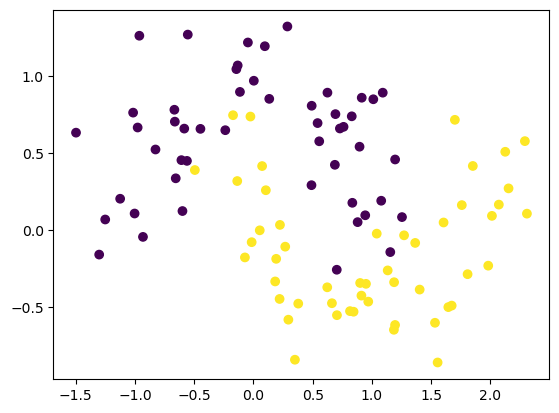

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(100, noise=0.25, random_state=2)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [5]:
# Build the model with dropout layers
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
adam = Adam(learning_rate=0.01)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
history = model.fit(X, y, epochs=2000, validation_split=0.2, verbose=0)

9600/9600 [==============================] - 5s 503us/step


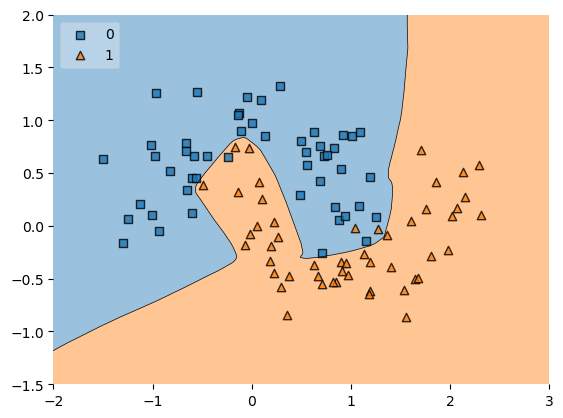

In [7]:
# Visualize the decision boundary
plot_decision_regions(X, y.astype("int"), clf=model, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

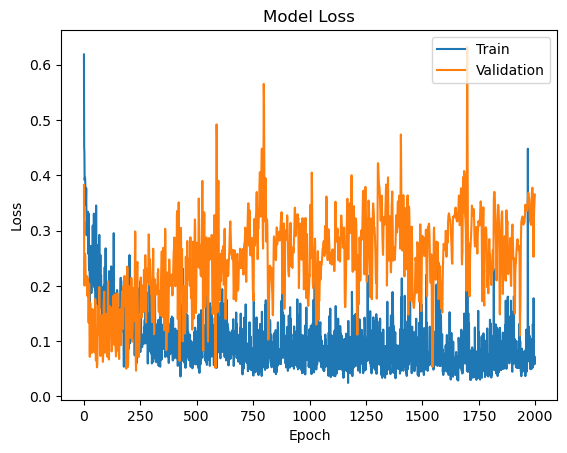

In [8]:
# Plot the loss curve
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

In [10]:
# Calculation of accuarcy for the model
accuracy = history.history["accuracy"][-1] * 100
accuracy

96.24999761581421